<a href="https://colab.research.google.com/github/noahgift/core-stats-datascience/blob/master/Lesson3_2_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning (EM & GMM)

## Expectation Maximation

### Basics of Gaussian Mixture Models

### Examples

#### Old Faithful

![old faithful](https://user-images.githubusercontent.com/58792/61162957-2230e900-a4d9-11e9-9c77-97d290964473.png)

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/machine_learning_fundamentals/master/faithful.csv")
df.columns = ["Observation_ID", "eruptions", "waiting"]
df.drop(["Observation_ID"], inplace=True, axis=1) #not needed with pandas index
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Descriptive statistics

In [0]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


* What eruption value would be improbable?

* What eruption value would be impossible?

In [0]:
3.0 * df.std()

eruptions     3.424114
waiting      40.784921
dtype: float64

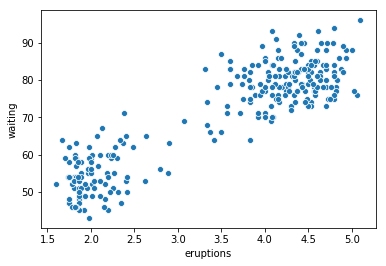

In [0]:
import seaborn as sns
sns.scatterplot(x="eruptions", y="waiting", data=df)

Bi-variate Density Plot

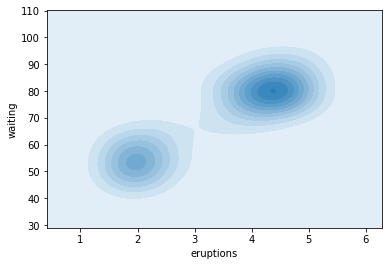

In [0]:
ax = sns.kdeplot(df.eruptions, df.waiting,shade=True)

Bi-variate density curve

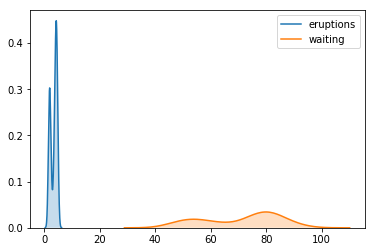

In [0]:
ax = sns.kdeplot(df.eruptions,shade=True)
ax = sns.kdeplot(df.waiting,shade=True)

#### Speaker Identification

Voice identity:
* Lexical choice
* Speed
* Volume
* Phonetic choice
* Idiosyncrasies

Use Gaussian MM to fit observed distribution of frames.
* Estimate probability that new frame is generated by same speaker.



#### Anomaly Detection

##### Fraud detection

* Model normal users using p(x).
* Flag users with p(x)<e.

##### Machines in manufacturing plants

Six Sigma

![six sigma](https://user-images.githubusercontent.com/58792/61163315-5d341c00-a4db-11e9-95fd-3a5e800ec5dd.png)


##### Computer in data center

Three Stories about Standard Deviation!

* Disney Film Studio (The 'unusual checkins')
* Game Company Lost Revenue ('Daily Registration')
* Social Network ('Intermittent Failure')



### Normal Distribution

* Central limit theorem: Sum of samples from any random variable tends to be normally distributed.
* sums and differences are also Gausian

**2-D Gausians**

* Larger variances give more spread distributions.
* Smaller variances give more peaked distributions.
* Nonzero covariance values influence angle of distributions.

![2-D Gaussians](https://user-images.githubusercontent.com/58792/61161995-7a192100-a4d4-11e9-9aa0-07a1adcb054a.png)

#### Plot Normal Distribution

Central limit theorem in action:  *Sum of samples from any random variable tends to be normally distributed.*

In [0]:
import seaborn as sns
from scipy.stats import norm

def generate_normal_plot(size=100):
  """Generates a random normal distribution plot"""
  
  normal_data = norm.rvs(size=size, scale=1)
  ax = sns.distplot(normal_data,
                 bins=100,
                 kde=False)
  ax.set(xlabel='Normal', ylabel='Frequency')

100 Observations (Less Normal)

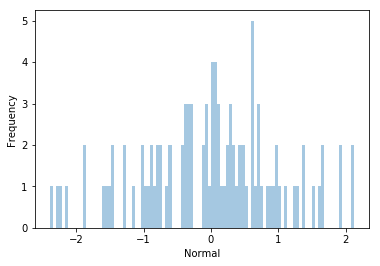

In [0]:
generate_normal_plot(100)

1000 Observations (More Normal, but with some random skew)

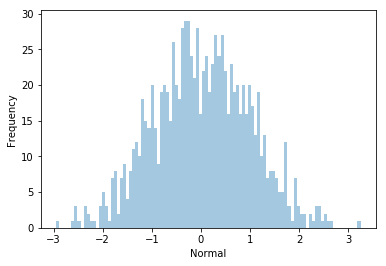

In [0]:
generate_normal_plot(1000)

10000 Observations (Always Normal)

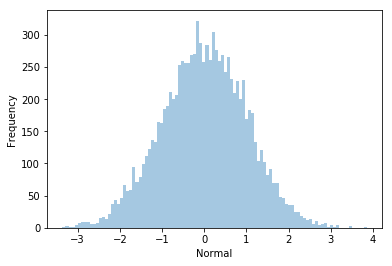

In [0]:
generate_normal_plot(10000)

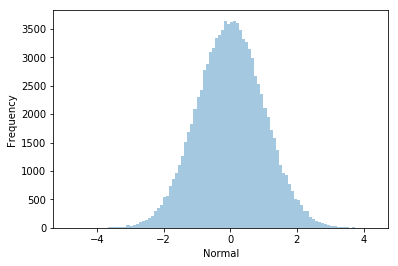

In [0]:
generate_normal_plot(100000)

### Clustering Comparison Examples

Automatically created module for IPython interactive environment


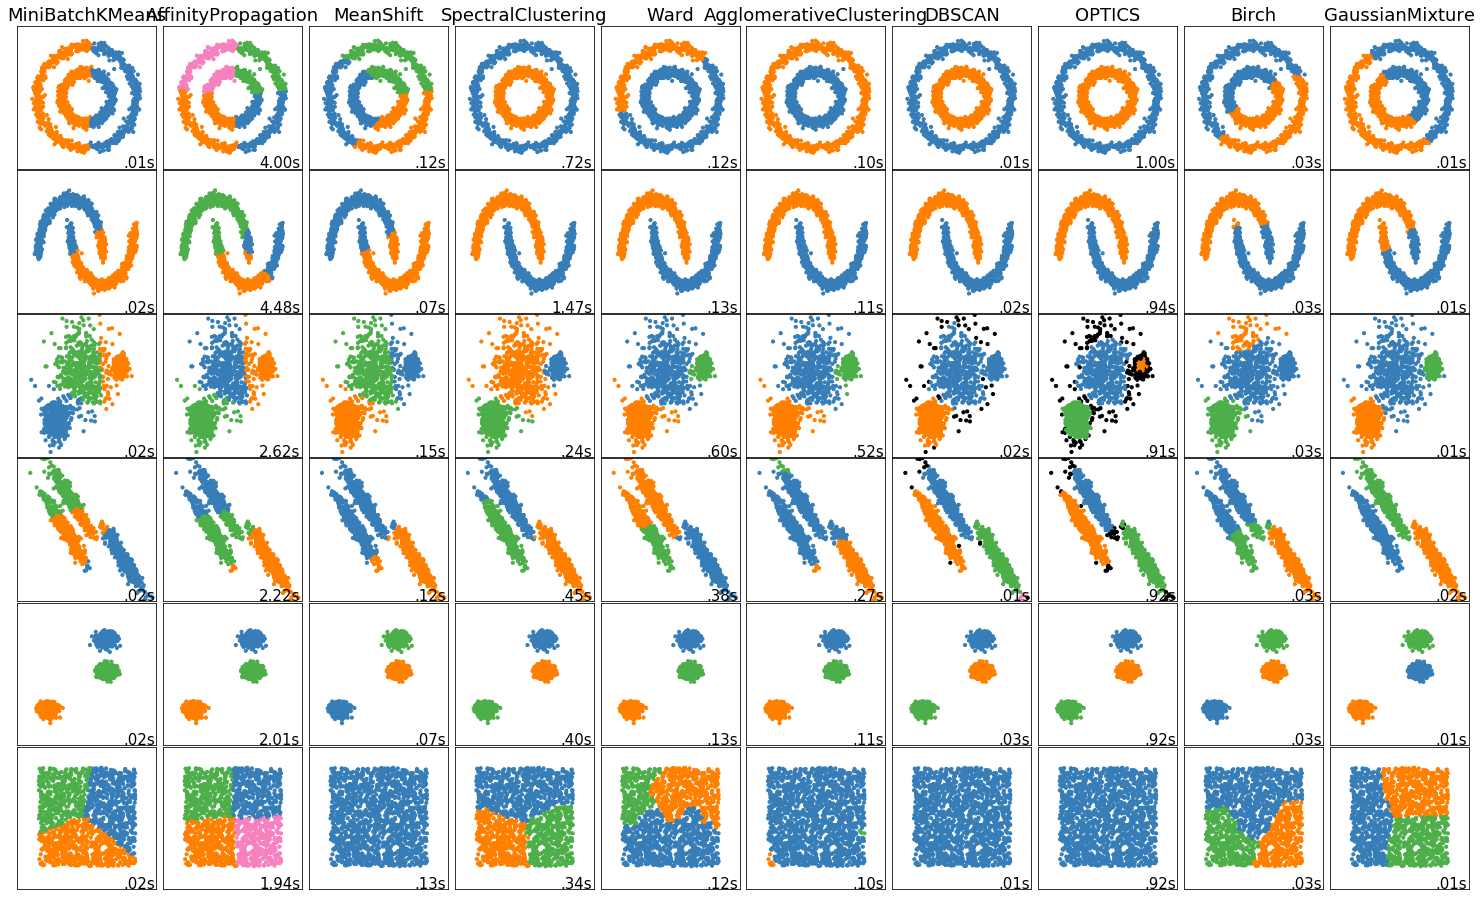

In [0]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()